In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import librosa
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns

In [3]:
DATA_PATH = 'datasets/naturalis/_data'
CLASSES = {'bird': 'birddata', 'insect': 'insectdata', 'speech': 'speechdata'}

In [4]:
print(CLASSES)

{'bird': 'birddata', 'insect': 'insectdata', 'speech': 'speechdata'}


In [5]:
def load_data():

    _df = pd.DataFrame()
    for c in tqdm(CLASSES):
        for f in os.listdir(os.path.join(DATA_PATH, CLASSES[c])):

            filename = os.path.join(DATA_PATH, CLASSES[c], f)

            signal, sr = librosa.load(filename, sr=None)
            duration = librosa.get_duration(y=signal, sr=sr)

            _df = pd.concat([_df, pd.DataFrame({
                'filename': [f],
                'class': [c],
                'signal': [signal],
                'sr': [sr],
                'duration': duration
            })], ignore_index=True)

    return _df

In [6]:
df = load_data()

  0%|          | 0/3 [00:00<?, ?it/s]Warning: Xing stream size off by more than 1%, fuzzy seeking may be even more fuzzy than by design!
Note: Illegal Audio-MPEG-Header 0x736f6e74 at offset 60928.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x3134372c at offset 227776.
Note: Trying to resync...
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).
/tmp/ipykernel_8417/2526208789.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(filename, sr=None)
/home/user38/miniconda3/envs/tf/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
100%|██████████| 3/3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1683 non-null   object 
 1   class     1683 non-null   object 
 2   signal    1683 non-null   object 
 3   sr        1683 non-null   int64  
 4   duration  1683 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 65.9+ KB


In [8]:
df

,filename,class,signal,sr,duration
0,100883.mp3,bird,"[-0.028448224, -0.02893795, -0.027458098, -0.0...",44100,5.589751
1,101099.mp3,bird,"[0.0, 1.5479648e-10, 2.6580455e-10, 1.8536567e...",44100,5.224490
2,103070.mp3,bird,"[0.0, -5.1203236e-11, -1.0153434e-11, -2.65691...",44100,3.500408
3,104564.mp3,bird,"[1.1867769e-09, 1.612432e-05, 1.7233624e-05, -...",44100,4.904286
4,107232.mp3,bird,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100,5.694694
...,...,...,...,...,...
1678,8842-302203-0001.flac,speech,"[0.0007324219, 0.0005187988, 0.00061035156, 0....",16000,9.485000
1679,8842-304647-0004.flac,speech,"[0.0, 0.00064086914, 0.00079345703, 0.00076293...",16000,10.155000
1680,8842-304647-0011.flac,speech,"[0.00039672852, 0.00039672852, 6.1035156e-05, ...",16000,8.755000
1681,8842-304647-0012.flac,speech,"[-0.00039672852, -0.00036621094, -0.0001525878...",16000,4.325000


In [9]:
df['class'].value_counts()

bird      786
speech    569
insect    328
Name: class, dtype: int64

In [10]:
print(df.describe())
print(df[df['class'] == 'bird'].describe())
print(df[df['class'] == 'insect'].describe())
print(df[df['class'] == 'speech'].describe())

                 sr     duration
count   1683.000000  1683.000000
mean   35084.284017     6.417014
std    13921.903520     5.615485
min    16000.000000     1.004898
25%    16000.000000     4.179592
50%    44100.000000     5.248729
75%    44100.000000     7.852531
max    96000.000000   167.248005
                 sr    duration
count    786.000000  786.000000
mean   45137.468193    4.576776
std     4017.422100    0.851155
min    16000.000000    2.444649
25%    44100.000000    3.896384
50%    44100.000000    4.605159
75%    48000.000000    5.282197
max    96000.000000    6.000000
            sr    duration
count    328.0  328.000000
mean   44100.0   10.698211
std        0.0   11.114253
min    44100.0    1.004898
25%    44100.0    8.068934
50%    44100.0   10.000000
75%    44100.0   10.000000
max    44100.0  167.248005
            sr    duration
count    569.0  569.000000
mean   16000.0    6.491169
std        0.0    2.446982
min    16000.0    3.005000
25%    16000.0    4.415000
50%    160

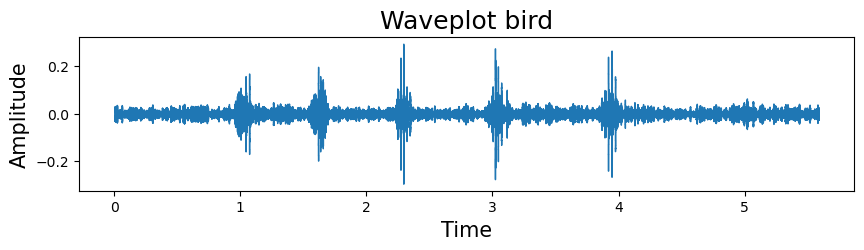

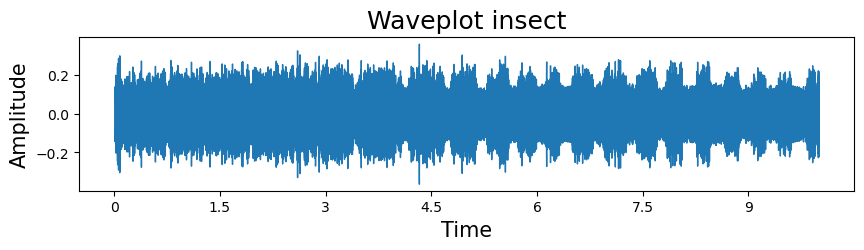

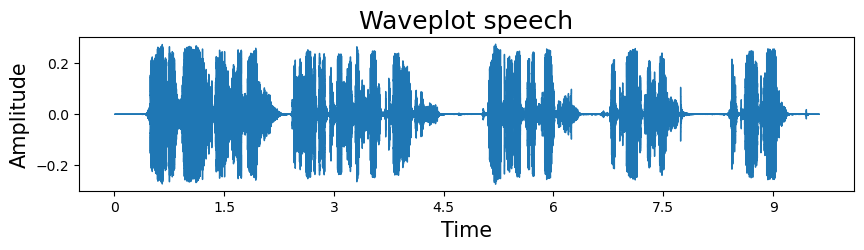

In [11]:
for c in CLASSES:
    single = df[df['class'] == c].iloc[0]

    plt.figure(figsize=(10, 2))
    librosa.display.waveshow(single['signal'], sr=single['sr'])
    plt.title(f'Waveplot {c}', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.show()

In [12]:
DURATION = 6
SAMPLE_RATE = 35000
N_MELLS = 128

In [13]:
def preprocess(signal):
    signal = librosa.util.fix_length(signal, size=int(DURATION * SAMPLE_RATE))
    mel = librosa.feature.melspectrogram(y=signal, sr=SAMPLE_RATE, n_mels=N_MELLS)
    mel = librosa.power_to_db(mel, ref=np.max)
    mel = mel[..., np.newaxis]
    return mel

(128, 411)


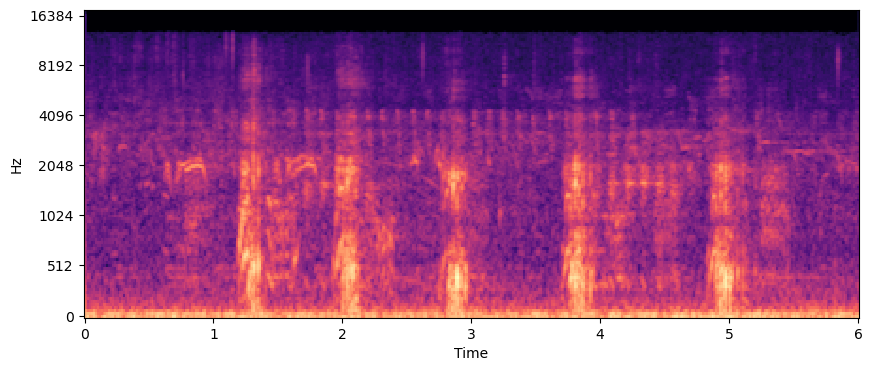

In [14]:
fisrt_bird = df[df['class'] == 'bird'].iloc[0]

spec = preprocess(fisrt_bird['signal'])
spec = spec[:, :, 0]
print(spec.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spec, x_axis='time', y_axis='mel', sr=SAMPLE_RATE)

In [15]:
X = np.array([preprocess(s) for s in df['signal']])
print(X.shape)

(1683, 128, 411, 1)


In [16]:
X = X.swapaxes(1, 2)

In [17]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['class'])

y = to_categorical(y)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)

(1346, 411, 128, 1)
(1346, 3)


In [20]:
from tensorflow.python.keras import models, layers

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(411, 128, 1)


2023-04-03 17:59:19.729615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-03 17:59:19.757947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-03 17:59:19.758204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-03 17:59:19.758969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 409, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 204, 63, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 411264)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                26320960  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 26,321,475
Trainable params: 26,321,475
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

2023-04-03 18:00:06.436395: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 283241472 exceeds 10% of free system memory.
2023-04-03 18:00:06.632142: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 283241472 exceeds 10% of free system memory.


Epoch 1/10


2023-04-03 18:00:07.686395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-03 18:00:08.805677: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-03 18:00:09.849076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


42/43 [============================>.] - ETA: 0s - loss: 4026.1562 - accuracy: 0.5439

2023-04-03 18:00:11.297982: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 70915584 exceeds 10% of free system memory.
2023-04-03 18:00:11.600355: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 70915584 exceeds 10% of free system memory.


43/43 [==============================] - 6s 55ms/step - loss: 4021.1587 - accuracy: 0.5438 - val_loss: 197.4180 - val_accuracy: 0.8487
Epoch 2/10
43/43 [==============================] - 1s 17ms/step - loss: 104.8546 - accuracy: 0.8975 - val_loss: 35.4306 - val_accuracy: 0.9407
Epoch 3/10
43/43 [==============================] - 1s 15ms/step - loss: 26.6009 - accuracy: 0.9458 - val_loss: 11.5262 - val_accuracy: 0.9703
Epoch 4/10
43/43 [==============================] - 1s 15ms/step - loss: 14.9192 - accuracy: 0.9658 - val_loss: 7.9182 - val_accuracy: 0.9614
Epoch 5/10
43/43 [==============================] - 1s 15ms/step - loss: 5.3641 - accuracy: 0.9822 - val_loss: 7.9282 - val_accuracy: 0.9792
Epoch 6/10
43/43 [==============================] - 1s 15ms/step - loss: 3.8798 - accuracy: 0.9859 - val_loss: 12.4436 - val_accuracy: 0.9703
Epoch 7/10
43/43 [==============================] - 1s 15ms/step - loss: 2.1558 - accuracy: 0.9889 - val_loss: 1.9840 - val_accuracy: 0.9941
Epoch 8/10
4

Text(0.5, 0, 'Epoch')

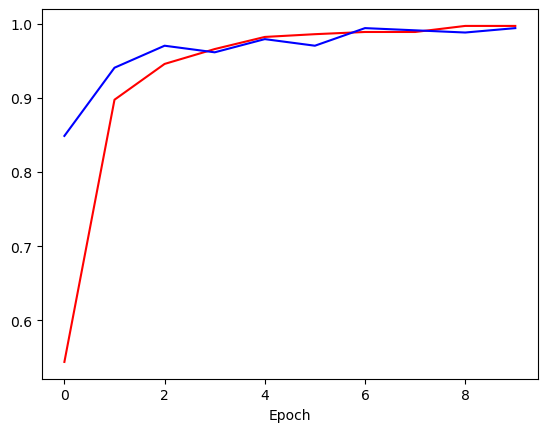

In [22]:
plt.plot(history.history['accuracy'],'r', label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.xlabel('Epoch')

In [23]:
acc = np.array(history.history['accuracy'])
val_acc = np.array(history.history['val_accuracy'])
loss = np.array(history.history['loss'])
epochs = range(1, len(acc) + 1)

print(acc.mean())
print(val_acc.mean())
print(loss.mean())

0.9292719244956971
0.9637982308864593
418.3143354594707


In [24]:
y_pred = model.predict(X_val)

2023-04-03 18:00:28.151645: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 70915584 exceeds 10% of free system memory.


Text(0.5, 23.52222222222222, 'Predicted')

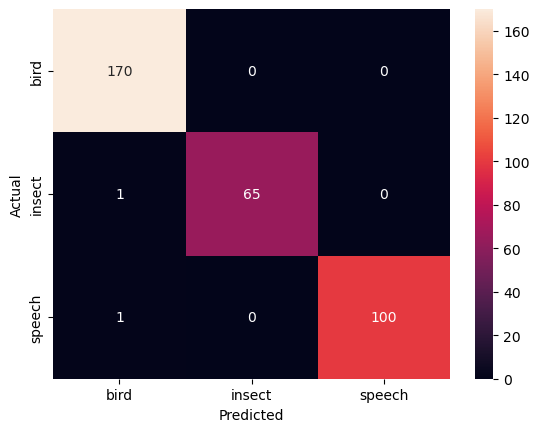

In [25]:
confusion_matrix = tf.math.confusion_matrix(labels=np.argmax(y_val, axis=1), predictions=np.argmax(y_pred, axis=1))

sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=CLASSES.keys(), yticklabels=CLASSES.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [26]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")